In [1]:
import re
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
filename="Moviedata.txt" #path of the source data file

In [4]:
with open(filename,"r") as file :
        AS = re.findall(r'(\d+|NA)\s*\|\s(\d+\.\d+\.\d+\.\d+).*\|(.*)', file.read()) #fix the NA issue
        #AS = re.findall(r'(\d+).*\|.*\d+\.\d+\.\d+\.\d+.*\|(.*)', file.read())
        

with open(filename,"r") as file :
        location = re.findall(r'(\s\w\w\s)\|\s(\w*)\s*\|\s*(\w*)',file.read())
        
# with open(filename,"r") as file: 
#         IP = re.findall(r'\|\s(\d+\.\d+\.\d+\.\d+)\s+',file.read())
        
with open(filename,"r") as file: 
        Content = re.findall(r'(http:.*;)\|(.*?)\|(\d+)\|.*\|(.*)#(\d+)\sMB',file.read())


In [5]:
location = pd.DataFrame(location,columns=["CC","Registry","Time"])
AS =pd.DataFrame(AS,columns=["AS","IP","COM"])
#IP = pd.DataFrame(IP,columns=["IP"])
Content = pd.DataFrame(Content,columns=["Tracker","TDate","Piece_length","Title","Size"])

In [6]:
Join = location.join(AS)
#Join = Join.join(IP)
Join = Join.join(Content)
#Join = Join.dropna()

In [7]:
Join["AS"]=Join['AS'].apply(pd.to_numeric)
Join["Piece_length"]=Join['Piece_length'].apply(pd.to_numeric)
Join["Size"]=Join['Size'].apply(pd.to_numeric)
Join["TDate"]=Join["TDate"].apply(pd.to_datetime)

In [7]:
Join

,CC,Registry,Time,AS,IP,COM,Tracker,TDate,Piece_length,Title,Size
0,IT,ripencc,2010,12874,2.236.158.19,"FASTWEB, IT",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
1,EE,ripencc,2012,57858,5.153.233.59,"AS57858, EE",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
2,CA,arin,2005,23184,24.138.138.220,"PERSONA - PERSONA COMMUNICATIONS INC., CA",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
3,CA,arin,2014,40788,24.140.254.38,"START-CA - Start Communications, CA",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
4,GR,ripencc,2011,25472,37.6.127.60,"WIND-AS, GR",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
5,US,arin,,174,38.87.81.82,"COGENT-174 - Cogent Communications, US",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
6,CA,arin,2012,855,47.54.131.12,CANET-ASN-4 - Bell Aliant Regional Communicat...,http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
7,PH,apnic,2010,9299,49.149.146.105,IPG-AS-AP Philippine Long Distance Telephone ...,http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
8,CN,apnic,2005,4837,58.19.58.97,"CHINA169-BACKBONE CNCGROUP China169 Backbone, CN",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
9,TH,apnic,2005,55423,58.82.184.95,"JASTEL-NETWORK-TH-IDC-AP JasTel Network, TH",http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420


In [115]:
len(Join)

5569

In [8]:
Join.to_csv("Join2.csv")

In [9]:
kkk = Join.groupby("Title")

In [21]:
kkk.count()

,CC,Registry,Time,AS,COM,IP,Tracker,TDate,Piece_length,Size
Title,,,,,,,,,,
#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.Nighter.2017.HDRip.XviD.AC3-EVO.nfo#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,59,59,59,59,59,59,59,59,59,59
#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-FGT.mkv#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-FGT.nfo#English-FORCED.srt#English.srt#RARBG.txt,27,27,27,27,27,27,27,27,27,27
#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.nfo#Subtitles/English-Forced.srt#Subtitles/English.srt#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,102,102,102,102,102,102,102,102,102,102
#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2017.HDRip.XviD.AC3-EVO.nfo#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,46,46,46,46,46,46,46,46,46,46
#Badrinath Ki Dulhania 2017 team egool.m4v,9,9,9,9,9,9,9,9,9,9
#Badrinath-Ki-Dulhania-Hindi-2017-DVDscr-x264-MRF-mp4.torrent,7,7,7,7,7,7,7,7,7,7
#Beauty.And.The.Beast.2017.HDCAM.700MB.x264-DiRG.mp4#Beauty.and.the.Beast.2017.HDCAM.700MB.x264-DiRG.nfo#DiRG.jpg#Sample.mp4,104,104,104,104,104,104,104,104,104,104
#Breaking Bad The Movie.nfo#Breaking.Bad.The.Movie.2017.HDRip.XViD.AC3-ETRG.avi#ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,100,100,100,100,100,100,100,100,100,100
#Collateral Beauty.nfo#Collateral.Beauty.2016.BRRip.XViD-ETRG.avi#Collateral.Beauty.2016.BRRip.XViD-ETRG.srt#ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,97,97,97,97,97,97,97,97,97,97


In [22]:
len(kkk.count())

95

In [10]:
kkk_count = kkk.count()
Peer_feq = kkk_count["CC"].values

In [11]:
Cont = Join[["Tracker","TDate","Size","Piece_length","Title"]]
Cont = Cont.drop_duplicates()
Cont = Cont.sort_values("Title")
Cont["Freq"]= Peer_feq
Cont.head()

,Tracker,TDate,Size,Piece_length,Title,Freq
0,http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,1420,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,59
162,http://explodie.org:6969/announce|http://track...,Fri Mar 10 04:23:29 2017,4125,1048576,#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-...,27
239,http://explodie.org:6969/announce|http://track...,Tue Mar 7 22:40:28 2017,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,102
341,http://explodie.org:6969/announce|http://track...,Tue Mar 21 11:49:57 2017,1396,262144,#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2...,46
416,http://explodie.org:6969/announce|http://track...,Sat Mar 11 07:32:04 2017,684,1048576,#Badrinath Ki Dulhania 2017 team egool.m4v,9


In [ ]:
sns.set(rc={"figure.figsize": (25, 15)})
sns.distplot(AS["AS"],kde=True)

In [ ]:
AS["AS"].plot.bar()

In [12]:
#nn[nn["COM"].str.contains('AMAZON')]
nn=Join

In [ ]:
print nn[nn["COM"].str.contains('AMAZON')].count()
print nn.count()

In [ ]:
# rr = pd.Series([nn[nn["COM"].str.contains('AMAZON')]["AS"].count(),nn["AS"].count()])
# rr.plot.bar()

In [122]:
ng = nn.groupby("AS")

In [123]:
new = ng["AS"].count()

In [ ]:
type(new)

In [ ]:
sorted_data = new.sort_values(ascending=False)
print len(sorted_data)
#sorted_data

In [ ]:
log_sorted = pd.DataFrame({"Index":range(len(sorted_data[0:100])),"Log":sorted_data[0:100].apply(np.log)})
#log_sorted = pd.DataFrame(data={"Log":sorted_data.apply(np.log)})
type(log_sorted)
sns.regplot(x="Index", y="Log", data=log_sorted)
#sns.regplot(data=log_sorted)

In [ ]:
log_sorted = pd.DataFrame({"Index":range(len(sorted_data)),"Log":sorted_data.apply(np.log)})
#log_sorted = pd.DataFrame(data={"Log":sorted_data.apply(np.log)})
type(log_sorted)
sns.regplot(x="Index", y="Log", data=log_sorted)

In [ ]:
sns.distplot(sorted_data,kde=False)

In [ ]:
sns.kdeplot(sorted_data, shade=True);

In [ ]:
sorted_data.plot(kind='bar')

In [ ]:
cumulative = np.cumsum(sorted_data) #CDF using cumsum
cumulative = cumulative/cumulative.max() #convert to percent
index = pd.Series(range(len(sorted_data)))
index = index/len(sorted_data)
cumulative = pd.DataFrame({"Index":index,"%":cumulative.values}) #convert into DataFrame
cumulative.plot.scatter(x="Index",y="%",xlim=[0,1],ylim=[0,1])

In [ ]:
sorted_data[0:100].plot.bar()

In [13]:
Amazon = nn[nn["COM"].str.contains('AMAZON')]
Others = nn[~nn["COM"].str.contains('AMAZON')]

In [125]:
Group= Others.groupby("AS")
SortGroup = Group["AS"].count().sort_values(ascending=False)
#SortGroup

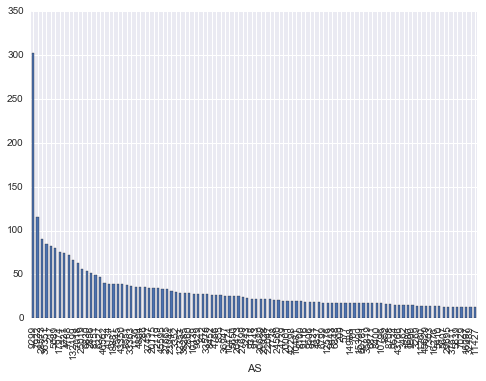

In [126]:
SortGroup[0:100].plot.bar()

In [14]:
Group2= Others.groupby("COM")
SortGroup = Group2["AS"].count().sort_values(ascending=False)
SortGroup.head(15)

COM
 IPG-AS-AP Philippine Long Distance Telephone Company, PH    303
 COMCAST-7922 - Comcast Cable Communications, LLC, US        115
 CLARO S.A., BR                                               91
 SOFTLAYER - SoftLayer Technologies Inc., US                  85
 UMN-SYSTEM - University of Minnesota, US                     83
 NTL, GB                                                      80
 TELKOMNET-AS2-AP PT Telekomunikasi Indonesia, ID             76
 ASN-TELSTRA Telstra Pty Ltd, AU                              74
 TMNET-AS-AP TM Net, Internet Service Provider, MY            72
 TELEFÔNICA BRASIL S.A, BR                                    66
 GLOBE-MOBILE-5TH-GEN-AS Globe Telecom Inc., PH               66
 ATT-INTERNET4 - AT&T Services, Inc., US                      63
 SAUDINETSTC-AS, SA                                           56
 LGI-UPC formerly known as UPC Broadband Holding B.V., AT     54
 BT-UK-AS BTnet UK Regional network, GB                       52
Name: AS, dtype: int6

In [26]:
SortGroup.to_csv("ISP.csv")

In [ ]:
SortGroup[0:100].plot.bar()

In [ ]:
Group3= Amazon.groupby("COM")
SortGroup = Group3["AS"].count().sort_values(ascending=False)
SortGroup

In [ ]:
#SortGroup.plot.bar()

In [ ]:
Group4= Amazon.groupby("AS")
Group4["AS"].count().sort_values(ascending=False)

In [ ]:
Peers = pd.DataFrame([[90,9240],[104,8139],[2,4966],[1,3349],[8,2875],[20,2038],[24,346]], columns=['Normal Peers', 'Cloud Peers'],index=["TV","Movie","Music","APP","Games","Others","Amine"])

In [ ]:
Peers

In [ ]:
Peers.plot(kind="bar",stacked=True)

In [ ]:
CC = location.groupby("CC")
Reg = location.groupby("Registry")
Tim = location.groupby("Time")

In [ ]:
CC = CC["CC"].count().sort_values(ascending=False)
Reg = Reg["Registry"].count().sort_values(ascending=False)
Tim = Tim["Time"].count()

In [ ]:
print Reg
print Reg.sum()
print 1557.0/3575

In [ ]:
Reg.plot.bar()

In [ ]:
CC.plot.bar()
CC.head(15)

In [ ]:
pd.DataFrame([len(CC),196],columns=["CC"],index=["# of countries","total"]).plot(kind='bar')
print len(CC)
print float(len(CC))/196

In [ ]:
Tim = Tim[1:] #drop the empty one

In [ ]:
Tim.plot.bar()

In [ ]:
Tim.plot.kde()

# Here is the analysis of cloud based peers************************************************************************************

In [15]:
Cloud = Join[Join["COM"].str.contains('AMAZON')] #boolean index

In [12]:
Cloud

,CC,Registry,Time,AS,COM,IP,Tracker,TDate,Piece_length,Title,Size
222,US,arin,2014,16509,"AMAZON-02 - Amazon.com, Inc., US",54.68.1.232,http://explodie.org:6969/announce|http://track...,Fri Mar 10 08:46:17 2017,4194304,#Subs/English.srt#Assassins Creed 2016 1080p W...,3272
223,US,arin,2015,16509,"AMAZON-02 - Amazon.com, Inc., US",52.57.161.25,http://explodie.org:6969/announce|http://track...,Fri Mar 10 08:46:17 2017,4194304,#Subs/English.srt#Assassins Creed 2016 1080p W...,3272
224,US,arin,2016,16509,"AMAZON-02 - Amazon.com, Inc., US",35.176.9.157,http://explodie.org:6969/announce|http://track...,Fri Mar 10 08:46:17 2017,4194304,#Subs/English.srt#Assassins Creed 2016 1080p W...,3272
236,US,arin,2015,16509,"AMAZON-02 - Amazon.com, Inc., US",52.57.255.252,http://explodie.org:6969/announce|http://track...,Fri Mar 10 09:33:50 2017,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#E...,869
237,US,arin,2015,16509,"AMAZON-02 - Amazon.com, Inc., US",52.56.251.227,http://explodie.org:6969/announce|http://track...,Fri Mar 10 09:33:50 2017,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#E...,869
238,US,arin,2016,16509,"AMAZON-02 - Amazon.com, Inc., US",34.209.239.220,http://explodie.org:6969/announce|http://track...,Fri Mar 10 09:33:50 2017,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#E...,869
333,US,arin,2015,16509,"AMAZON-02 - Amazon.com, Inc., US",52.57.255.252,http://explodie.org:6969/announce|http://track...,Tue Mar 7 22:40:28 2017,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
337,US,arin,2016,16509,"AMAZON-02 - Amazon.com, Inc., US",34.209.239.220,http://explodie.org:6969/announce|http://track...,Tue Mar 7 22:40:28 2017,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
605,US,arin,2016,16509,"AMAZON-02 - Amazon.com, Inc., US",35.176.22.52,http://explodie.org:6969/announce|http://track...,Thu Mar 16 11:56:21 2017,1048576,#Breaking Bad The Movie.nfo#Breaking.Bad.The.M...,1429
606,US,arin,2016,16509,"AMAZON-02 - Amazon.com, Inc., US",35.158.49.188,http://explodie.org:6969/announce|http://track...,Thu Mar 16 11:56:21 2017,1048576,#Breaking Bad The Movie.nfo#Breaking.Bad.The.M...,1429


In [13]:
CloudIP = Cloud["IP"]

In [14]:
CloudIP = CloudIP.sort_values()
CloudIP

2136      104.63.88.198
2624    105.226.234.138
3485      107.179.151.4
3396    108.168.221.105
2443    108.168.221.108
2036     109.104.34.180
5351      110.45.93.146
3550      117.253.50.90
5209     123.231.123.97
3096     124.104.21.167
3682       131.212.64.4
4033       131.212.64.4
5164       131.212.64.4
4760       131.212.64.4
5208       131.212.64.4
3703       131.212.64.4
4645       131.212.64.4
3923       131.212.64.4
4615       131.212.64.4
3694       131.212.64.4
4889       131.212.64.4
2047      138.36.107.82
4888     166.182.80.151
4759       167.62.9.166
5362      184.173.25.82
4644       184.173.3.27
3922     206.231.120.37
4548     213.204.117.60
607      34.208.102.222
238      34.209.239.220
             ...       
2564      54.186.153.67
222         54.68.1.232
3704       54.70.124.16
2625       54.70.124.16
2482      54.71.106.211
3330      54.71.106.211
1399      54.71.177.255
643       54.71.177.255
3650        58.6.99.133
3377      60.67.132.246
3329       62.24

In [ ]:
with open("CloudIP.txt","wb") as file :
    #path of the source data file
        #np.savetxt(file, CloudIP.values)
        #file.write(CloudIP.values)
        file.write(CloudIP.to_csv())

In [ ]:
def IP_toInt(x): #function to calculate IP
    parts = x.split('.')
    return (int(parts[0]) << 24) + (int(parts[1]) << 16) + (int(parts[2]) << 8) + int(parts[3])

In [ ]:
IntIP = []
for i in CloudIP.values:
    IntIP.append(IP_toInt(i))

In [ ]:
IntIP

In [ ]:
with open("CloudIPInt.txt","ab") as file :
    file.writelines(["%s\n" % item  for item in IntIP])

# Content

In [18]:
CloudContent = Cloud.groupby("Title").count()

In [16]:
CloudContent

,CC,Registry,Time,AS,COM,IP,Tracker,TDate,Piece_length,Size
Title,,,,,,,,,,
#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.nfo#Subtitles/English-Forced.srt#Subtitles/English.srt#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,2,2,2,2,2,2,2,2,2,2
#Breaking Bad The Movie.nfo#Breaking.Bad.The.Movie.2017.HDRip.XViD.AC3-ETRG.avi#ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,3,3,3,3,3,3,3,3,3,3
#Collateral Beauty.nfo#Collateral.Beauty.2016.BRRip.XViD-ETRG.avi#Collateral.Beauty.2016.BRRip.XViD-ETRG.srt#ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,3,3,3,3,3,3,3,3,3,3
#Collateral.Beauty.2016.720p.BluRay.x264-GECKOS.mkv#RARBG.txt#Subs/Collateral.Beauty.2016.720p.BluRay.x264-GECKOS.idx#Subs/Collateral.Beauty.2016.720p.BluRay.x264-GECKOS.sub#collateral.beauty.2016.720p.bluray.x264-geckos.jpg#collateral.beauty.2016.720p.bluray.x264-geckos.nfo,3,3,3,3,3,3,3,3,3,3
#ETRG.mp4#Office Christmas Party.nfo#Office.Christmas.Party.2016.HDRip.XViD.AC3-ETRG.avi#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,2,2,2,2,2,2,2,2,2,2
#ETRG.mp4#Res Evil The Final Chapter.nfo#Resident.Evil.The.Final.Chapter.2016.HDRip.XViD-ETRG.avi#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,4,4,4,4,4,4,4,4,4,4
#ETRG.mp4#Resident.Evil.The.Final.Chapter.2017.TC.x264.AC3-ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.mp4,3,3,3,3,3,3,3,3,3,3
#ETRG.mp4#Rogue One.nfo#Rogue.One.2016.BRRip.XViD.AC3-ETRG.avi#Rogue.One.2016.BRRip.XViD.AC3-ETRG.srt#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,1,1,1,1,1,1,1,1,1,1
#ETRG.mp4#Sing.2016.HDRip.XViD-ETRG.avi#Sing.2016.HDRip.XViD-ETRG.srt#Sing.nfo#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,2,2,2,2,2,2,2,2,2,2


In [23]:
len(CloudContent)

57

In [19]:
Peer_feq = CloudContent["CC"].values
CloudFile = Cloud[["Tracker","TDate","Size","Piece_length","Title"]]
CloudFile = CloudFile.drop_duplicates()

In [20]:
len(CloudFile)

57

In [31]:
CloudContent[["CC"]].values
len(CloudContent[["CC"]].values)

57

In [34]:
CloudFile.sort_values(["Title"])

,Tracker,TDate,Size,Piece_length,Title
333,http://explodie.org:6969/announce|http://track...,Tue Mar 7 22:40:28 2017,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...
605,http://explodie.org:6969/announce|http://track...,Thu Mar 16 11:56:21 2017,1429,1048576,#Breaking Bad The Movie.nfo#Breaking.Bad.The.M...
733,http://explodie.org:6969/announce|http://track...,Sat Feb 25 03:32:05 2017,707,1048576,#Collateral Beauty.nfo#Collateral.Beauty.2016....
643,http://explodie.org:6969/announce|http://track...,Fri Feb 24 17:48:47 2017,4488,524288,#Collateral.Beauty.2016.720p.BluRay.x264-GECKO...
2290,http://explodie.org:6969/announce|http://track...,Thu Mar 9 12:39:43 2017,1430,1048576,#ETRG.mp4#Office Christmas Party.nfo#Office.Ch...
2563,http://explodie.org:6969/announce|http://track...,Tue Mar 14 15:30:50 2017,705,1048576,#ETRG.mp4#Res Evil The Final Chapter.nfo#Resid...
2716,http://explodie.org:6969/announce|http://track...,Mon Feb 27 12:15:52 2017,1256,1048576,#ETRG.mp4#Resident.Evil.The.Final.Chapter.2017...
3485,http://explodie.org:6969/announce|http://track...,Fri Mar 17 17:43:21 2017,1430,1048576,#ETRG.mp4#Rogue One.nfo#Rogue.One.2016.BRRip.X...
4001,http://explodie.org:6969/announce|http://track...,Fri Mar 3 02:35:26 2017,708,1048576,#ETRG.mp4#Sing.2016.HDRip.XViD-ETRG.avi#Sing.2...
4221,http://explodie.org:6969/announce|http://track...,Fri Mar 17 06:04:35 2017,1431,1048576,#ETRG.mp4#Split.2016.HDRip.XViD.AC3-ETRG.avi#S...


In [22]:
CloudFile["Freq"]= Peer_feq

In [32]:
CloudFile

,Tracker,TDate,Size,Piece_length,Title
222,http://explodie.org:6969/announce|http://track...,Fri Mar 10 08:46:17 2017,3272,4194304,#Subs/English.srt#Assassins Creed 2016 1080p W...
236,http://explodie.org:6969/announce|http://track...,Fri Mar 10 09:33:50 2017,869,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#E...
333,http://explodie.org:6969/announce|http://track...,Tue Mar 7 22:40:28 2017,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...
605,http://explodie.org:6969/announce|http://track...,Thu Mar 16 11:56:21 2017,1429,1048576,#Breaking Bad The Movie.nfo#Breaking.Bad.The.M...
643,http://explodie.org:6969/announce|http://track...,Fri Feb 24 17:48:47 2017,4488,524288,#Collateral.Beauty.2016.720p.BluRay.x264-GECKO...
733,http://explodie.org:6969/announce|http://track...,Sat Feb 25 03:32:05 2017,707,1048576,#Collateral Beauty.nfo#Collateral.Beauty.2016....
946,http://explodie.org:6969/announce|http://track...,Sat Feb 25 01:58:53 2017,13126,4194304,#Fantastic.Beasts.and.Where.to.Find.Them.2016....
1145,http://explodie.org:6969/announce|http://track...,Thu Feb 23 23:41:24 2017,4917,1048576,#English.srt#Fences.2016.1080p.WEB-DL.DD5.1.H2...
1199,http://explodie.org:6969/announce|http://track...,Fri Feb 24 08:19:29 2017,1061,2097152,#Fences-(2016)-720p-WEB-DL-1GB--MkvCage.torrent
1399,http://explodie.org:6969/announce|http://track...,Sun Mar 5 07:47:09 2017,789,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#F...


In [ ]:
np.savetxt(r'./Content.txt', CloudFile.values, fmt='%s')

In [62]:
Cont

,Tracker,TDate,Size,Piece_length,Title,Freq
0,http://explodie.org:6969/announce|http://track...,Fri Mar 24 07:01:35 2017,1420,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,59
59,http://explodie.org:6969/announce|http://track...,Mon Mar 13 19:56:36 2017,1810,524288,#WWW.YTS.AG.jpg#Assassin's.Creed.2016.1080p.Bl...,27
162,http://explodie.org:6969/announce|http://track...,Fri Mar 10 04:23:29 2017,4125,1048576,#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-...,102
189,http://explodie.org:6969/announce|http://track...,Fri Mar 10 08:46:17 2017,3272,4194304,#Subs/English.srt#Assassins Creed 2016 1080p W...,46
229,http://explodie.org:6969/announce|http://track...,Fri Mar 10 09:33:50 2017,869,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#E...,9
239,http://explodie.org:6969/announce|http://track...,Tue Mar 7 22:40:28 2017,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,7
341,http://explodie.org:6969/announce|http://track...,Tue Mar 21 11:49:57 2017,1396,262144,#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2...,104
387,http://explodie.org:6969/announce|http://track...,Sun Apr 30 05:50:02 2017,702,1048576,#[www.mastitorrents.net] Badrinath Ki Dulhania...,100
416,http://explodie.org:6969/announce|http://track...,Sat Mar 11 07:32:04 2017,684,1048576,#Badrinath Ki Dulhania 2017 team egool.m4v,97
425,http://explodie.org:6969/announce|http://track...,Fri Mar 24 13:34:45 2017,561,1048576,#Badrinath-Ki-Dulhania-Hindi-2017-DVDscr-x264-...,10


In [23]:
Final = pd.merge(Cont, CloudFile[["Title","Freq"]], on='Title', how='outer')
Final = Final.fillna(value=0)

In [178]:
Final

,Tracker,TDate,Size,Piece_length,Title,Freq_x,Freq_y
0,http://explodie.org:6969/announce|http://track...,2017-03-24 07:01:35,1420,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,59,0.0
1,http://explodie.org:6969/announce|http://track...,2017-03-10 04:23:29,4125,1048576,#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-...,27,0.0
2,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,102,3.0
3,http://explodie.org:6969/announce|http://track...,2017-03-21 11:49:57,1396,262144,#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2...,46,0.0
4,http://explodie.org:6969/announce|http://track...,2017-03-11 07:32:04,684,1048576,#Badrinath Ki Dulhania 2017 team egool.m4v,9,0.0
5,http://explodie.org:6969/announce|http://track...,2017-03-24 13:34:45,561,1048576,#Badrinath-Ki-Dulhania-Hindi-2017-DVDscr-x264-...,7,0.0
6,http://explodie.org:6969/announce|http://track...,2017-03-20 13:41:43,710,262144,#Beauty.And.The.Beast.2017.HDCAM.700MB.x264-Di...,104,0.0
7,http://explodie.org:6969/announce|http://track...,2017-03-16 11:56:21,1429,1048576,#Breaking Bad The Movie.nfo#Breaking.Bad.The.M...,100,3.0
8,http://explodie.org:6969/announce|http://track...,2017-02-25 03:32:05,707,1048576,#Collateral Beauty.nfo#Collateral.Beauty.2016....,97,4.0
9,http://explodie.org:6969/announce|http://track...,2017-02-24 17:48:47,4488,524288,#Collateral.Beauty.2016.720p.BluRay.x264-GECKO...,10,2.0


In [24]:
def f(x):
    return x["Freq_y"]/x["Freq_x"]

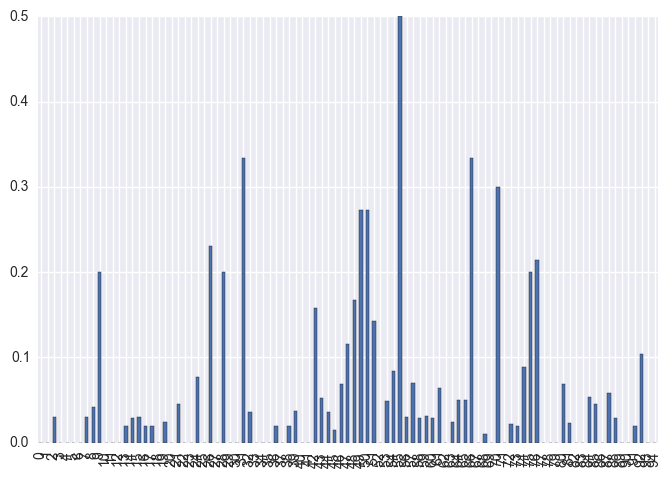

In [25]:
Final["Freq"] =Final.apply(f,axis=1)
Final["Freq"].plot.bar()

In [624]:
Final = Final.sort_values("Freq",ascending=False)
Final

,Tracker,TDate,Size,Piece_length,Title,Freq_x,Freq_y,Freq
55,http://explodie.org:6969/announce|http://track...,2017-03-09 15:20:31,2811,1048576,#RARBG.txt#xXx.Return.Of.Xander.Cage.2017.720p...,8,4.0,0.500000
66,http://explodie.org:6969/announce|http://track...,2017-03-07 06:22:17,3037,4194304,#Subs/English.srt#Sing 2016 1080p WEB-DL x264 ...,9,3.0,0.333333
31,http://explodie.org:6969/announce|http://track...,2017-02-25 01:58:53,13126,4194304,#Fantastic.Beasts.and.Where.to.Find.Them.2016....,9,3.0,0.333333
70,http://explodie.org:6969/announce|http://track...,2017-03-10 09:33:50,869,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#E...,10,3.0,0.300000
50,http://explodie.org:6969/announce|http://track...,2017-03-22 22:44:31,4298,1048576,#RARBG.txt#Split.2016.1080p.KORSUB.HDRip.x264....,11,3.0,0.272727
49,http://explodie.org:6969/announce|http://track...,2017-03-07 17:30:23,4486,524288,#RARBG.txt#Sing.2016.1080p.BluRay.x264-SPARKS....,11,3.0,0.272727
26,http://explodie.org:6969/announce|http://track...,2017-03-02 23:15:59,4309,1048576,#English.srt#RARBG.txt#Sing.2016.1080p.WEB-DL....,13,3.0,0.230769
76,http://explodie.org:6969/announce|http://track...,2017-03-04 05:02:48,846,1048576,#Torrent Downloaded From ExtraTorrent.cc.txt#S...,14,3.0,0.214286
28,http://explodie.org:6969/announce|http://track...,2017-03-13 23:29:57,4456,1048576,#English.srt#RARBG.txt#Why.Him.2016.1080p.WEB-...,15,3.0,0.200000
9,http://explodie.org:6969/announce|http://track...,2017-02-24 17:48:47,4488,524288,#Collateral.Beauty.2016.720p.BluRay.x264-GECKO...,10,2.0,0.200000


In [183]:
for i in range(len(Final)):
    if Final.iloc[i]["Freq"]>=1 :
        print i
        Final.iloc[i,7]=0

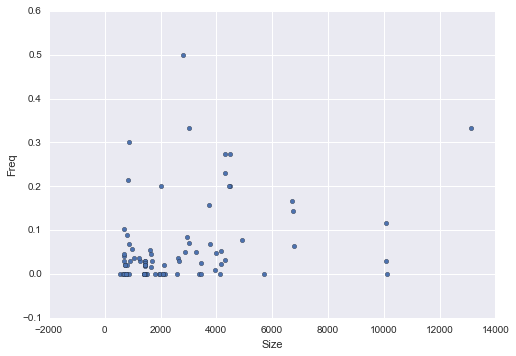

In [263]:
Final.plot(kind="scatter",x="Size",y="Freq")

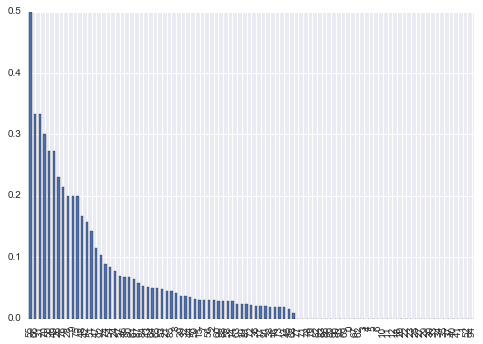

In [185]:
Final["Freq"].plot.bar()

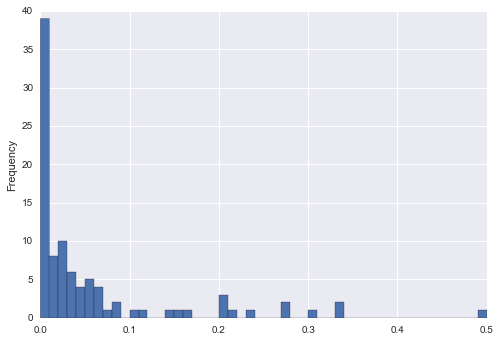

In [628]:
Final["Freq"].plot.hist(bins=50)

In [190]:
Final["Freq"].describe()

count    95.000000
mean      0.056158
std       0.092576
min       0.000000
25%       0.000000
50%       0.021277
75%       0.055632
max       0.500000
Name: Freq, dtype: float64

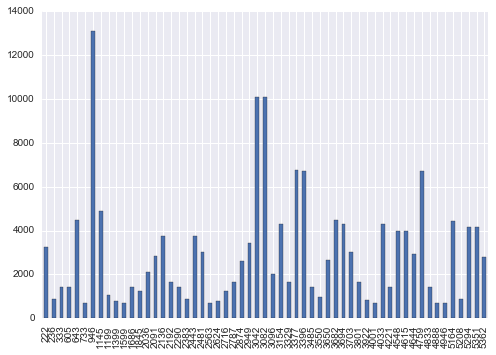

In [112]:
CloudFile["Size"]=CloudFile["Size"].apply(pd.to_numeric)
CloudFile["Size"].plot.bar()

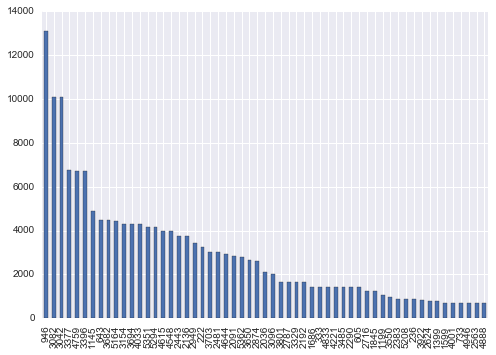

In [262]:
CloudFile = CloudFile.sort_values("Size",ascending=False)
CloudFile["Size"].plot.bar()

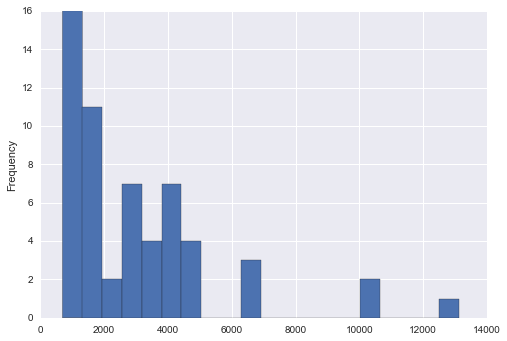

In [630]:
CloudFile["Size"].plot.hist(bins=20)

In [113]:
CloudFile["Size"].describe()

count       57.000000
mean      2982.508772
std       2556.992235
min        691.000000
25%       1243.000000
50%       2123.000000
75%       4180.000000
max      13126.000000
Name: Size, dtype: float64

# Try other company

In [236]:
PH = Join[Join["COM"].str.contains('Philippine')] #boolean index

In [237]:
PH

,CC,Registry,Time,AS,COM,IP,Tracker,TDate,Piece_length,Title,Size
7,PH,apnic,2010,9299,IPG-AS-AP Philippine Long Distance Telephone ...,49.149.146.105,http://explodie.org:6969/announce|http://track...,2017-03-24 07:01:35,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
55,PH,apnic,2010,9299,IPG-AS-AP Philippine Long Distance Telephone ...,49.151.165.6,http://explodie.org:6969/announce|http://track...,2017-03-24 07:01:35,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,1420
146,PH,apnic,2009,9299,IPG-AS-AP Philippine Long Distance Telephone ...,112.209.180.23,http://explodie.org:6969/announce|http://track...,2017-03-13 19:56:36,524288,#WWW.YTS.AG.jpg#Assassin's.Creed.2016.1080p.Bl...,1810
165,PH,apnic,2009,9299,IPG-AS-AP Philippine Long Distance Telephone ...,112.211.103.142,http://explodie.org:6969/announce|http://track...,2017-03-10 04:23:29,1048576,#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-...,4125
246,PH,apnic,2010,9299,IPG-AS-AP Philippine Long Distance Telephone ...,49.146.5.222,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
247,PH,apnic,2010,9299,IPG-AS-AP Philippine Long Distance Telephone ...,49.146.9.246,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
248,PH,apnic,2010,9299,IPG-AS-AP Philippine Long Distance Telephone ...,49.146.213.211,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
281,PH,apnic,2009,9299,IPG-AS-AP Philippine Long Distance Telephone ...,112.210.150.213,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
287,PH,apnic,2006,9299,IPG-AS-AP Philippine Long Distance Telephone ...,122.3.183.62,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445
288,PH,apnic,2006,9299,IPG-AS-AP Philippine Long Distance Telephone ...,122.54.199.144,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,1445


In [238]:
PHContent = PH.groupby("Title").count()

In [239]:
PHContent

,CC,Registry,Time,AS,COM,IP,Tracker,TDate,Piece_length,Size
Title,,,,,,,,,,
#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.Nighter.2017.HDRip.XviD.AC3-EVO.nfo#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,2,2,2,2,2,2,2,2,2,2
#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-FGT.mkv#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-FGT.nfo#English-FORCED.srt#English.srt#RARBG.txt,1,1,1,1,1,1,1,1,1,1
#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.nfo#Subtitles/English-Forced.srt#Subtitles/English.srt#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,11,11,11,11,11,11,11,11,11,11
#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2017.HDRip.XviD.AC3-EVO.nfo#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,2,2,2,2,2,2,2,2,2,2
#Beauty.And.The.Beast.2017.HDCAM.700MB.x264-DiRG.mp4#Beauty.and.the.Beast.2017.HDCAM.700MB.x264-DiRG.nfo#DiRG.jpg#Sample.mp4,14,14,14,14,14,14,14,14,14,14
#Collateral Beauty.nfo#Collateral.Beauty.2016.BRRip.XViD-ETRG.avi#Collateral.Beauty.2016.BRRip.XViD-ETRG.srt#ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,5,5,5,5,5,5,5,5,5,5
#Dark Silence.nfo#Dark.Silence.2016.HDRip.XViD-ETRG.avi#ETRG.mp4#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,1,1,1,1,1,1,1,1,1,1
#ETRG.mp4#Elite.2017.WEBRip.XViD-ETRG.avi#Elite.nfo#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,4,4,4,4,4,4,4,4,4,4
#ETRG.mp4#Little Mermaid.nfo#Little.Mermaid.2016.HDRip.XViD-ETRG.avi#Little.Mermaid.2016.HDRip.XViD-ETRG.srt#Torrent Downloaded From ExtraTorrent.cc.txt#sample.avi,9,9,9,9,9,9,9,9,9,9


In [240]:
len(PHContent)

69

In [241]:
Peer_feq = PHContent["CC"].values
PHFile = PH[["Tracker","TDate","Size","Piece_length","Title"]]
PHFile = PHFile.drop_duplicates()
PHFile.sort_values(["Title"])
PHFile["Freq"]= Peer_feq

In [242]:
PHFile

,Tracker,TDate,Size,Piece_length,Title,Freq
7,http://explodie.org:6969/announce|http://track...,2017-03-24 07:01:35,1420,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,2
146,http://explodie.org:6969/announce|http://track...,2017-03-13 19:56:36,1810,524288,#WWW.YTS.AG.jpg#Assassin's.Creed.2016.1080p.Bl...,1
165,http://explodie.org:6969/announce|http://track...,2017-03-10 04:23:29,4125,1048576,#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-...,11
246,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,2
356,http://explodie.org:6969/announce|http://track...,2017-03-21 11:49:57,1396,262144,#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2...,14
432,http://explodie.org:6969/announce|http://track...,2017-03-20 13:41:43,710,262144,#Beauty.And.The.Beast.2017.HDCAM.700MB.x264-Di...,5
655,http://explodie.org:6969/announce|http://track...,2017-02-25 03:32:05,707,1048576,#Collateral Beauty.nfo#Collateral.Beauty.2016....,1
772,http://explodie.org:6969/announce|http://track...,2017-03-01 03:31:26,708,1048576,#Dark Silence.nfo#Dark.Silence.2016.HDRip.XViD...,4
811,http://explodie.org:6969/announce|http://track...,2017-03-15 08:51:51,707,1048576,#ETRG.mp4#Elite.2017.WEBRip.XViD-ETRG.avi#Elit...,9
858,http://explodie.org:6969/announce|http://track...,2017-03-04 09:13:47,1414,262144,#Fallen.2016.V2.DVDRip.XviD.AC3-EVO.avi#Fallen...,5


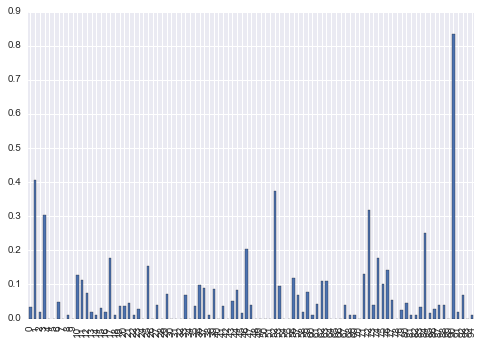

In [243]:
Final2 = pd.merge(Cont, PHFile[["Title","Freq"]], on='Title', how='outer')
Final2 = Final2.fillna(value=0)
Final2["Freq"] =Final2.apply(f,axis=1)
Final2["Freq"].plot.bar()

In [244]:
Final2

,Tracker,TDate,Size,Piece_length,Title,Freq_x,Freq_y,Freq
0,http://explodie.org:6969/announce|http://track...,2017-03-24 07:01:35,1420,262144,#All.Nighter.2017.HDRip.XviD.AC3-EVO.avi#All.N...,59,2.0,0.033898
1,http://explodie.org:6969/announce|http://track...,2017-03-10 04:23:29,4125,1048576,#Assassins.Creed.2016.1080p.WEB-DL.DD5.1.H264-...,27,11.0,0.407407
2,http://explodie.org:6969/announce|http://track...,2017-03-07 22:40:28,1445,262144,#Assassins.Creed.2016.DVDRip.XviD.AC3-EVO.avi#...,102,2.0,0.019608
3,http://explodie.org:6969/announce|http://track...,2017-03-21 11:49:57,1396,262144,#Atomica.2017.HDRip.XviD.AC3-EVO.avi#Atomica.2...,46,14.0,0.304348
4,http://explodie.org:6969/announce|http://track...,2017-03-11 07:32:04,684,1048576,#Badrinath Ki Dulhania 2017 team egool.m4v,9,0.0,0.000000
5,http://explodie.org:6969/announce|http://track...,2017-03-24 13:34:45,561,1048576,#Badrinath-Ki-Dulhania-Hindi-2017-DVDscr-x264-...,7,0.0,0.000000
6,http://explodie.org:6969/announce|http://track...,2017-03-20 13:41:43,710,262144,#Beauty.And.The.Beast.2017.HDCAM.700MB.x264-Di...,104,5.0,0.048077
7,http://explodie.org:6969/announce|http://track...,2017-03-16 11:56:21,1429,1048576,#Breaking Bad The Movie.nfo#Breaking.Bad.The.M...,100,0.0,0.000000
8,http://explodie.org:6969/announce|http://track...,2017-02-25 03:32:05,707,1048576,#Collateral Beauty.nfo#Collateral.Beauty.2016....,97,1.0,0.010309
9,http://explodie.org:6969/announce|http://track...,2017-02-24 17:48:47,4488,524288,#Collateral.Beauty.2016.720p.BluRay.x264-GECKO...,10,0.0,0.000000


# Matrix

In [219]:
len(SortGroup.index)

962

In [ ]:
Matirx = pd.DataFrame()
Matirx[0] = Final["Freq_y"]
count = 1
for i in SortGroup.index[0:94]:
    PH = Join[Join["COM"].str.contains(i)]
    PHContent = PH.groupby("Title").count()
    Peer_feq = PHContent["CC"].values
    PHFile = PH[["Tracker","TDate","Size","Piece_length","Title"]]
    PHFile = PHFile.drop_duplicates()
    PHFile = PHFile.sort_values(["Title"])
    PHFile["Freq"]= Peer_feq
    F2 = pd.merge(Cont, PHFile[["Title","Freq"]], on='Title', how='outer')
    F2 = F2.fillna(value=0)
    Matirx[count] = F2["Freq_y"]
    count = count + 1 


PH = Join[Join["COM"].str.contains("Etihad")]
PHContent = PH.groupby("Title").count()
Peer_feq = PHContent["CC"].values
PHFile = PH[["Tracker","TDate","Size","Piece_length","Title"]]
PHFile = PHFile.drop_duplicates()
PHFile = PHFile.sort_values(["Title"])
PHFile["Freq"]= Peer_feq
F2 = pd.merge(Cont, PHFile[["Title","Freq"]], on='Title', how='outer')
F2 = F2.fillna(value=0)
Matirx[77] = F2["Freq_y"]

Matirx

In [255]:
Matirx = pd.DataFrame()
Matirx[0] = Final["Freq_x"]
Matirx[1] = Final["Freq_y"]
count = 2
for i in SortGroup.index[0:94]:
    PH = Join[Join["COM"].str.contains(i)]
    PHContent = PH.groupby("Title").count()
    Peer_feq = PHContent["CC"].values
    PHFile = PH[["Tracker","TDate","Size","Piece_length","Title"]]
    PHFile = PHFile.drop_duplicates()
    PHFile = PHFile.sort_values(["Title"])
    PHFile["Freq"]= Peer_feq
    F2 = pd.merge(Cont, PHFile[["Title","Freq"]], on='Title', how='outer')
    F2 = F2.fillna(value=0)
    Matirx[count] = F2["Freq_y"]
    count = count + 1 

Matirx

c:\python27\lib\site-packages\ipykernel\__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,59,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,27,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102,3.0,11.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,46,0.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,104,0.0,14.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,100,3.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,97,4.0,5.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
Matirx.corr()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1.000000,-0.062211,0.562837,0.538767,0.484402,0.401088,-0.394955,0.431959,0.246926,0.496371,...,0.256878,0.052762,0.318973,0.290236,0.117690,0.381760,0.317784,0.218351,0.186697,0.151062
1,-0.062211,1.000000,-0.161920,0.005561,-0.030776,0.345860,0.203243,-0.146794,0.029142,-0.132205,...,-0.090597,0.006333,-0.106467,-0.135797,-0.253354,-0.214368,-0.068719,0.087186,-0.188156,-0.070456
2,0.562837,-0.161920,1.000000,0.072831,0.030609,0.256533,-0.150927,0.273739,0.346426,0.477543,...,0.024784,-0.075102,0.060244,0.026411,0.151527,0.360777,-0.048766,0.388345,0.081636,-0.002718
3,0.538767,0.005561,0.072831,1.000000,0.355378,0.123011,-0.368064,0.117519,-0.040632,0.069833,...,0.242059,0.124366,0.018562,0.349932,-0.060054,0.114133,0.332472,0.019849,0.256782,0.004226
4,0.484402,-0.030776,0.030609,0.355378,1.000000,0.042979,-0.093816,0.082513,-0.015165,0.098101,...,0.036709,0.114469,0.295461,0.250068,0.027700,0.106279,0.527171,0.057893,0.124980,0.227258
5,0.401088,0.345860,0.256533,0.123011,0.042979,1.000000,-0.130911,-0.150488,0.187874,0.049466,...,0.014553,-0.041483,0.203123,0.140227,-0.110739,0.013767,0.031396,0.217209,-0.138204,0.033865
6,-0.394955,0.203243,-0.150927,-0.368064,-0.093816,-0.130911,1.000000,-0.176296,0.023761,-0.017583,...,-0.072470,-0.016418,-0.300000,-0.082302,0.144864,-0.244992,-0.235160,-0.093368,-0.105695,0.041451
7,0.431959,-0.146794,0.273739,0.117519,0.082513,-0.150488,-0.176296,1.000000,0.182165,0.380676,...,0.025014,0.261098,0.102983,0.078442,0.141830,0.427150,0.142696,0.067854,0.153039,-0.035046
8,0.246926,0.029142,0.346426,-0.040632,-0.015165,0.187874,0.023761,0.182165,1.000000,0.008991,...,-0.012156,0.076235,0.273394,-0.039646,-0.033412,0.067466,-0.043273,0.081522,-0.034634,-0.016756
9,0.496371,-0.132205,0.477543,0.069833,0.098101,0.049466,-0.017583,0.380676,0.008991,1.000000,...,0.073124,-0.045431,0.097639,0.092035,0.278130,0.333897,0.057845,0.257402,0.127592,-0.089593


In [268]:
SortGroup.index[77]

' MOBILY-AS Etihad Etisalat Company (Mobily), SA'

In [362]:
Corr = Matirx.corr()
Corr = Corr.drop(0,axis=1)
Corr = Corr.drop(0,axis=0)

In [363]:
for i in range(95):
    Corr.iloc[i,i] = np.NaN

Corr.shape

(95, 95)

In [365]:
result = Corr.describe()

In [364]:
Corr = Corr.drop(6,axis=1) #drop UMN
Corr = Corr.drop(6,axis = 0)

In [366]:
result

,1,2,3,4,5,7,8,9,10,11,...,86,87,88,89,90,91,92,93,94,95
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,-0.030713,0.149236,0.154205,0.142021,0.095983,0.136081,0.043810,0.150729,0.109569,0.127211,...,0.075552,0.020945,0.093207,0.081461,0.032337,0.126378,0.098456,0.063586,0.059107,0.034467
std,0.116197,0.154935,0.134723,0.153433,0.115783,0.134240,0.099125,0.146632,0.124540,0.114680,...,0.103233,0.099943,0.138586,0.119217,0.134170,0.136007,0.161833,0.138560,0.108103,0.107554
min,-0.262372,-0.161920,-0.101916,-0.142101,-0.173329,-0.150488,-0.130423,-0.132205,-0.159656,-0.093196,...,-0.139198,-0.151370,-0.151056,-0.140251,-0.253354,-0.214368,-0.123125,-0.177474,-0.188156,-0.140023
25%,-0.096372,0.031265,0.072831,0.027700,0.030118,0.047906,-0.020387,0.043479,0.025045,0.064624,...,0.010310,-0.046138,-0.007296,0.004535,-0.060422,0.041535,-0.036166,-0.040791,-0.017205,-0.039339
50%,-0.035764,0.150446,0.133353,0.106093,0.100148,0.117519,0.013214,0.146408,0.099225,0.116169,...,0.057095,0.009041,0.078752,0.061696,-0.004897,0.124480,0.058549,0.048749,0.059763,0.017567
75%,0.030404,0.273739,0.248610,0.237873,0.172148,0.229366,0.090298,0.269774,0.179360,0.203404,...,0.143699,0.078280,0.194477,0.164617,0.132366,0.214960,0.186410,0.162751,0.125057,0.087484
max,0.345860,0.594416,0.493086,0.721080,0.376983,0.468005,0.439280,0.593097,0.473330,0.594416,...,0.327526,0.297365,0.456178,0.414336,0.375740,0.436344,0.616172,0.433623,0.378253,0.300196


In [367]:
result.T

,count,mean,std,min,25%,50%,75%,max
1,93.0,-0.030713,0.116197,-0.262372,-9.637188e-02,-0.035764,0.030404,0.345860
2,93.0,0.149236,0.154935,-0.161920,3.126514e-02,0.150446,0.273739,0.594416
3,93.0,0.154205,0.134723,-0.101916,7.283117e-02,0.133353,0.248610,0.493086
4,93.0,0.142021,0.153433,-0.142101,2.770044e-02,0.106093,0.237873,0.721080
5,93.0,0.095983,0.115783,-0.173329,3.011827e-02,0.100148,0.172148,0.376983
7,93.0,0.136081,0.134240,-0.150488,4.790606e-02,0.117519,0.229366,0.468005
8,93.0,0.043810,0.099125,-0.130423,-2.038736e-02,0.013214,0.090298,0.439280
9,93.0,0.150729,0.146632,-0.132205,4.347874e-02,0.146408,0.269774,0.593097
10,93.0,0.109569,0.124540,-0.159656,2.504500e-02,0.099225,0.179360,0.473330
11,93.0,0.127211,0.114680,-0.093196,6.462363e-02,0.116169,0.203404,0.594416


In [371]:
min(result.T["min"])

-0.26237219068723361

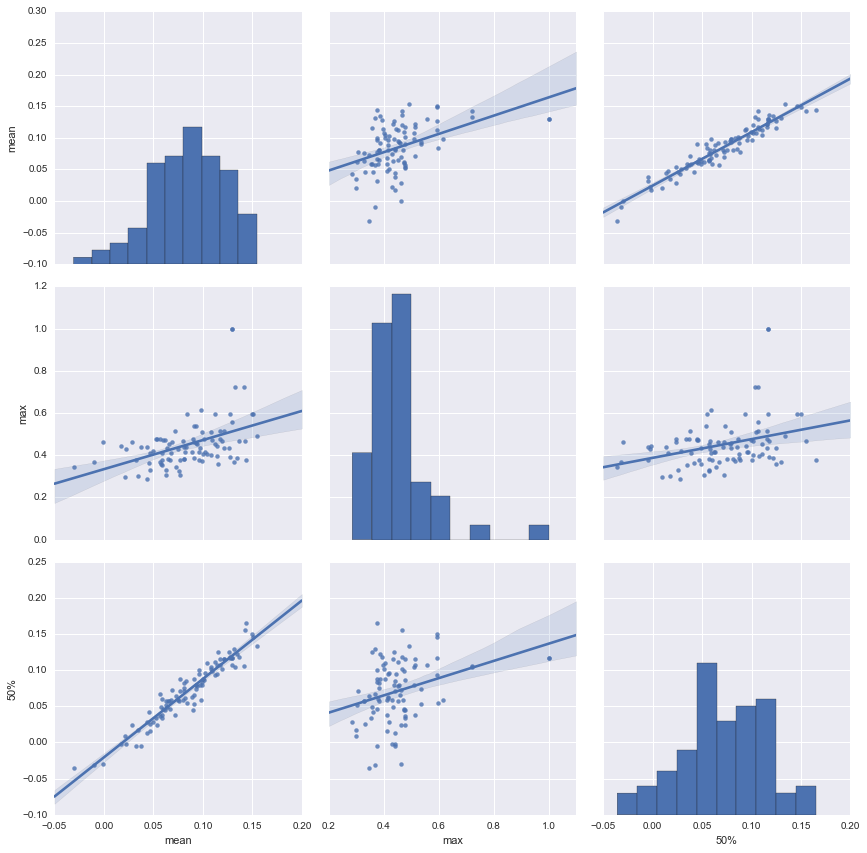

In [844]:
sns.pairplot(result.T,x_vars=["mean","max","50%"],y_vars=["mean","max","50%"],kind="reg",size=4)

In [349]:
xx =result.T["mean"]<0
result.T[xx]

,count,mean,std,min,25%,50%,75%,max
1,94.0,-0.028224,0.118063,-0.262372,-0.094928,-0.034333,0.042557,0.345860
6,94.0,-0.119891,0.126487,-0.463670,-0.180388,-0.115857,-0.025582,0.203243
44,94.0,-0.009333,0.076290,-0.107045,-0.055118,-0.030736,0.023961,0.369555
51,94.0,-0.000303,0.088587,-0.093196,-0.046355,-0.027713,0.000898,0.461198


In [355]:
SortGroup[[4,42,49]]

COM
 UMN-SYSTEM - University of Minnesota, US    83
 KIXS-AS-KR Korea Telecom, KR                27
 SKB-AS SK Broadband Co Ltd, KR              22
Name: AS, dtype: int64

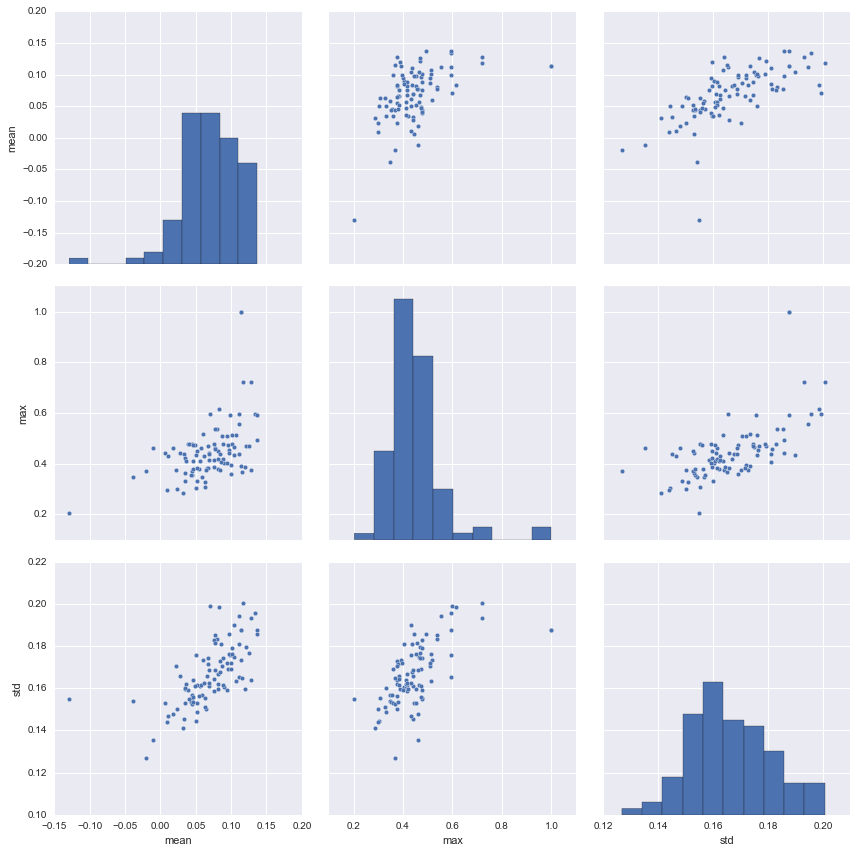

In [315]:
sns.pairplot(result.T,x_vars=["mean","max","std"],y_vars=["mean","max","std"],size=4)

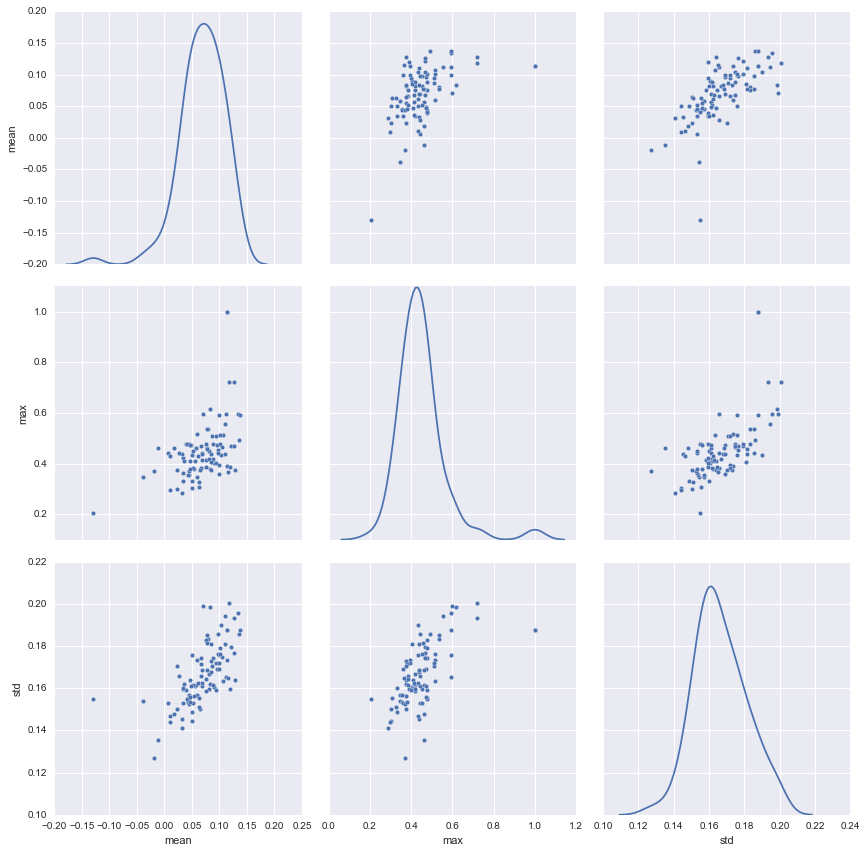

In [318]:
sns.pairplot(result.T,x_vars=["mean","max","std"],y_vars=["mean","max","std"],size=4,diag_kind="kde")

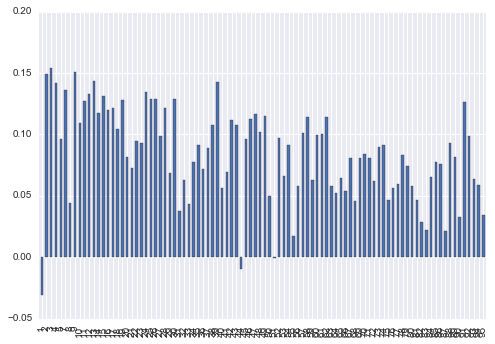

In [369]:
result.T["mean"].plot.bar()

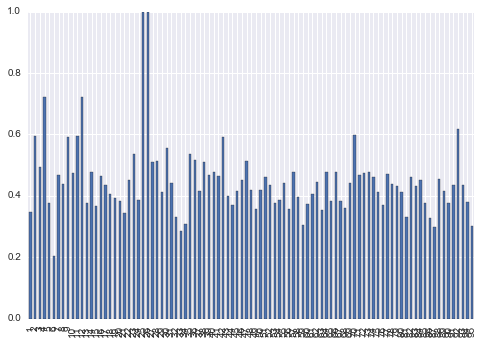

In [324]:
result.T["max"].plot.bar()

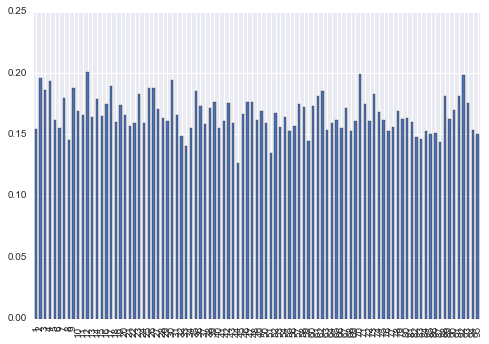

In [325]:
result.T["std"].plot.bar()

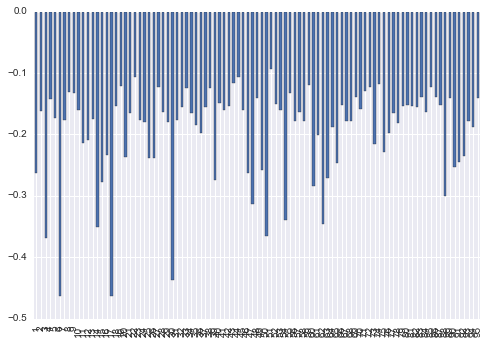

In [332]:
result.T["min"].plot.bar()

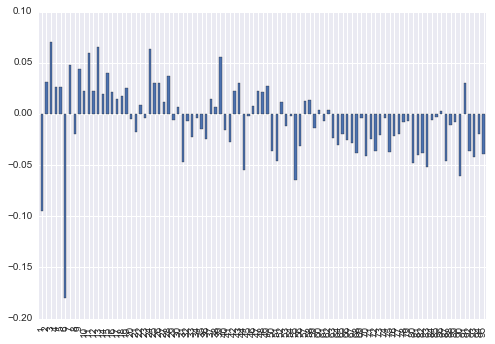

In [333]:
result.T["25%"].plot.bar()

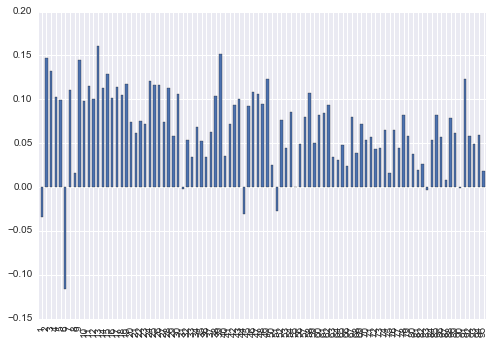

In [334]:
result.T["50%"].plot.bar()

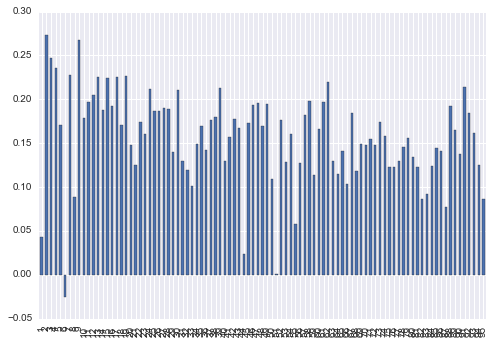

In [335]:
result.T["75%"].plot.bar()

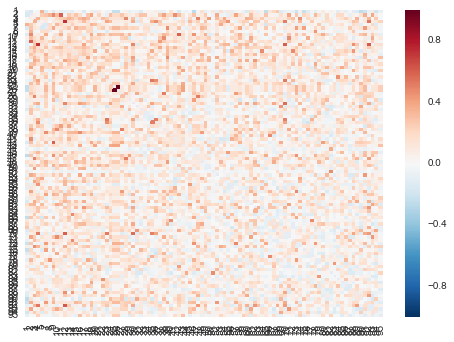

In [379]:
lo = -0.3
sns.heatmap(Corr,vmin =lo)

In [380]:
from sklearn.cluster import AgglomerativeClustering

In [381]:
AggC = AgglomerativeClustering(n_clusters=8)

In [385]:
for i in range(len(Corr)):
    Corr.iloc[i,i] = 0.0

In [386]:
AggC.fit(Corr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=8,
            pooling_func=<function mean at 0x04A3C930>)

In [388]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [394]:
AggC.labels_

array([5, 6, 4, 4, 1, 0, 1, 6, 1, 2, 4, 2, 3, 0, 0, 4, 2, 2, 0, 2, 2, 3, 0,
       0, 0, 6, 2, 7, 4, 7, 7, 7, 2, 3, 3, 2, 6, 0, 1, 1, 6, 0, 5, 1, 6, 4,
       0, 2, 1, 5, 2, 5, 4, 5, 1, 1, 2, 5, 4, 1, 4, 2, 1, 7, 1, 0, 5, 7, 3,
       1, 1, 6, 4, 7, 7, 5, 2, 0, 2, 2, 5, 0, 1, 1, 2, 5, 3, 4, 7, 0, 4, 1,
       7, 5])

In [398]:
from sklearn.cluster import DBSCAN

In [503]:
DB = DBSCAN(eps=1.27,min_samples=3)
DB.fit(Corr)

DBSCAN(algorithm='auto', eps=1.27, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [504]:
DB.labels_

array([ 0, -1, -1, -1, -1,  1,  0, -1, -1,  1, -1,  1, -1,  1,  1, -1,  0,
       -1,  0,  2,  0,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  3,  0,  1, -1,  0, -1, -1,  0, -1,  0, -1, -1,  3,  0,  0, -1,
        0,  0,  0,  0, -1,  3,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  2,  2,  0, -1,  0,  0,  0,
       -1, -1,  0,  0, -1, -1, -1,  0,  0])

In [505]:
len(DB.labels_)

94

In [506]:
print len(DB.labels_[DB.labels_==-1]),len(DB.labels_[DB.labels_==0]), len(DB.labels_[DB.labels_==1]),len(DB.labels_[DB.labels_==2])

37 45 6 3


In [544]:
len(set(DB.labels_))

5

In [671]:
CorrN = temp.corr()

In [672]:
CorrN

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1.000000,-0.161920,0.005561,-0.030776,0.345860,-0.146794,0.029142,-0.132205,0.051163,-0.090047,...,-0.090597,0.006333,-0.106467,-0.135797,-0.253354,-0.214368,-0.068719,0.087186,-0.188156,-0.070456
1,-0.161920,1.000000,0.072831,0.030609,0.256533,0.273739,0.346426,0.477543,0.301739,0.594416,...,0.024784,-0.075102,0.060244,0.026411,0.151527,0.360777,-0.048766,0.388345,0.081636,-0.002718
2,0.005561,0.072831,1.000000,0.355378,0.123011,0.117519,-0.040632,0.069833,0.202771,0.244517,...,0.242059,0.124366,0.018562,0.349932,-0.060054,0.114133,0.332472,0.019849,0.256782,0.004226
3,-0.030776,0.030609,0.355378,1.000000,0.042979,0.082513,-0.015165,0.098101,0.106093,0.153578,...,0.036709,0.114469,0.295461,0.250068,0.027700,0.106279,0.527171,0.057893,0.124980,0.227258
4,0.345860,0.256533,0.123011,0.042979,1.000000,-0.150488,0.187874,0.049466,0.320793,0.203404,...,0.014553,-0.041483,0.203123,0.140227,-0.110739,0.013767,0.031396,0.217209,-0.138204,0.033865
5,-0.146794,0.273739,0.117519,0.082513,-0.150488,1.000000,0.182165,0.380676,0.092798,0.120388,...,0.025014,0.261098,0.102983,0.078442,0.141830,0.427150,0.142696,0.067854,0.153039,-0.035046
6,0.029142,0.346426,-0.040632,-0.015165,0.187874,0.182165,1.000000,0.008991,0.018457,0.219092,...,-0.012156,0.076235,0.273394,-0.039646,-0.033412,0.067466,-0.043273,0.081522,-0.034634,-0.016756
7,-0.132205,0.477543,0.069833,0.098101,0.049466,0.380676,0.008991,1.000000,0.176436,0.363457,...,0.073124,-0.045431,0.097639,0.092035,0.278130,0.333897,0.057845,0.257402,0.127592,-0.089593
8,0.051163,0.301739,0.202771,0.106093,0.320793,0.092798,0.018457,0.176436,1.000000,0.143092,...,0.134977,-0.015822,-0.119482,0.033941,-0.018282,0.093930,-0.073344,0.371052,0.032645,0.097867
9,-0.090047,0.594416,0.244517,0.153578,0.203404,0.120388,0.219092,0.363457,0.143092,1.000000,...,0.082038,0.081138,0.105922,0.053118,0.065114,0.139771,0.024745,0.245786,0.053564,0.021856


In [527]:
Matirx = Matirx.drop(0,axis=1)

ValueError: labels [0] not contained in axis

In [528]:
Matirx = Matirx.drop(6,axis=1)

In [530]:
Matirx.columns = range(94) #re-index

In [669]:
temp = Matirx
Matirx

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,11.0,1.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,14.0,0.0,2.0,3.0,0.0,1.0,1.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,3.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,4.0,5.0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [682]:
temp = temp.T

In [545]:
G1 = temp[tmp == -1]
G2 = temp[tmp == 0]
G3 = temp[tmp == 1]
G4 = temp[tmp == 2]
G5 = temp[tmp == 3]

In [546]:
G = G1.append(G2).append(G3).append(G4).append(G5)

In [561]:
G= G.T
G.shape

(95, 94)

In [565]:
G1 = G.corr()

,1,2,3,4,7,8,10,12,15,17,...,11,13,14,37,19,78,79,35,47,56
1,1.000000,0.072831,0.030609,0.256533,0.477543,0.301739,-0.034785,0.174469,-0.046346,0.392147,...,0.253289,0.277439,0.177081,0.208660,0.219128,-0.053465,0.203909,0.270028,0.250767,1.735556e-01
2,0.072831,1.000000,0.355378,0.123011,0.069833,0.202771,0.273759,0.293544,0.379104,0.068919,...,0.344380,0.216742,0.320048,0.163735,0.078344,-0.049119,0.213756,0.073188,0.140104,1.064444e-01
3,0.030609,0.355378,1.000000,0.042979,0.098101,0.106093,0.721080,0.183310,0.306797,0.050931,...,0.195309,0.088771,0.187970,0.055343,-0.011681,0.120654,0.168965,0.267836,0.289635,1.848134e-01
4,0.256533,0.123011,0.042979,1.000000,0.049466,0.320793,0.127451,0.235096,0.073905,0.342460,...,0.107092,0.100148,0.077786,0.133780,0.172148,-0.052047,-0.034318,0.230640,0.201676,5.796058e-02
7,0.477543,0.069833,0.098101,0.049466,1.000000,0.176436,0.043477,0.132070,-0.086011,0.380231,...,0.223649,0.147926,0.163345,0.273512,0.321252,0.365517,0.218230,0.191572,0.357991,3.507910e-01
8,0.301739,0.202771,0.106093,0.320793,0.176436,1.000000,0.021361,0.145455,0.204423,0.241462,...,0.288932,0.100333,0.029668,0.069386,0.198687,0.125874,-0.003141,0.274082,0.195020,2.997497e-01
10,-0.034785,0.273759,0.721080,0.127451,0.043477,0.021361,1.000000,0.137250,0.398369,0.167203,...,0.165016,0.103942,0.091143,0.178956,-0.010841,0.070126,0.048057,0.169346,0.296977,3.112805e-01
12,0.174469,0.293544,0.183310,0.235096,0.132070,0.145455,0.137250,1.000000,0.242220,0.129952,...,0.168580,0.139121,0.187739,0.321986,0.014972,-0.052233,-0.035687,0.144586,0.045171,1.999947e-01
15,-0.046346,0.379104,0.306797,0.073905,-0.086011,0.204423,0.398369,0.242220,1.000000,0.022525,...,0.300459,0.267704,0.124694,0.266169,0.013974,-0.005789,-0.059899,0.215426,0.180274,3.365224e-01
17,0.392147,0.068919,0.050931,0.342460,0.380231,0.241462,0.167203,0.129952,0.022525,1.000000,...,0.174972,0.129830,0.084135,0.243256,0.331223,0.193063,0.331362,0.230687,0.273812,3.476230e-01


In [643]:
1-G1

,1,2,3,4,7,8,10,12,15,17,...,11,13,14,37,19,78,79,35,47,56
1,NaN,0.927169,0.969391,0.743467,0.522457,0.698261,1.034785,0.825531,1.046346,0.607853,...,0.746711,0.722561,0.822919,0.791340,0.780872,1.053465,0.796091,0.729972,0.749233,0.826444
2,0.927169,NaN,0.644622,0.876989,0.930167,0.797229,0.726241,0.706456,0.620896,0.931081,...,0.655620,0.783258,0.679952,0.836265,0.921656,1.049119,0.786244,0.926812,0.859896,0.893556
3,0.969391,0.644622,NaN,0.957021,0.901899,0.893907,0.278920,0.816690,0.693203,0.949069,...,0.804691,0.911229,0.812030,0.944657,1.011681,0.879346,0.831035,0.732164,0.710365,0.815187
4,0.743467,0.876989,0.957021,NaN,0.950534,0.679207,0.872549,0.764904,0.926095,0.657540,...,0.892908,0.899852,0.922214,0.866220,0.827852,1.052047,1.034318,0.769360,0.798324,0.942039
7,0.522457,0.930167,0.901899,0.950534,NaN,0.823564,0.956523,0.867930,1.086011,0.619769,...,0.776351,0.852074,0.836655,0.726488,0.678748,0.634483,0.781770,0.808428,0.642009,0.649209
8,0.698261,0.797229,0.893907,0.679207,0.823564,NaN,0.978639,0.854545,0.795577,0.758538,...,0.711068,0.899667,0.970332,0.930614,0.801313,0.874126,1.003141,0.725918,0.804980,0.700250
10,1.034785,0.726241,0.278920,0.872549,0.956523,0.978639,NaN,0.862750,0.601631,0.832797,...,0.834984,0.896058,0.908857,0.821044,1.010841,0.929874,0.951943,0.830654,0.703023,0.688720
12,0.825531,0.706456,0.816690,0.764904,0.867930,0.854545,0.862750,NaN,0.757780,0.870048,...,0.831420,0.860879,0.812261,0.678014,0.985028,1.052233,1.035687,0.855414,0.954829,0.800005
15,1.046346,0.620896,0.693203,0.926095,1.086011,0.795577,0.601631,0.757780,NaN,0.977475,...,0.699541,0.732296,0.875306,0.733831,0.986026,1.005789,1.059899,0.784574,0.819726,0.663478
17,0.607853,0.931081,0.949069,0.657540,0.619769,0.758538,0.832797,0.870048,0.977475,NaN,...,0.825028,0.870170,0.915865,0.756744,0.668777,0.806937,0.668638,0.769313,0.726188,0.652377


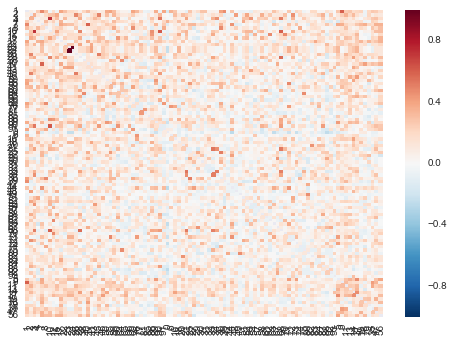

In [569]:
sns.heatmap(G1)

In [568]:
for i in range(94):
    G1.iloc[i,i] = np.NaN

G1.shape

(94, 94)

In [ ]:
for i in range(len(Corr)):
    Corr.iloc[i,i] = 0.0

In [879]:
n_clusters = 8
from sklearn.cluster import AgglomerativeClustering
AggC = AgglomerativeClustering(n_clusters= n_clusters,linkage="average",affinity="precomputed")

In [880]:
AggC.fit(1-CorrN)

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=8,
            pooling_func=<function mean at 0x04A3C930>)

In [881]:
AggC.labels_

array([4, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 7, 3, 2, 0, 5, 0, 2, 0,
       0, 2, 3, 5, 2, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 3, 1, 7, 0, 4, 2, 0,
       2, 3, 2, 0, 1, 0, 7, 0, 0, 2, 2, 5, 0, 0, 2, 0, 6, 0, 0, 2, 2, 0, 2,
       2, 0])

In [882]:
len(AggC.labels_[AggC.labels_==AggC.labels_[0]])

2

In [883]:
GG = []
GGG = pd.DataFrame()
tmp = pd.Series(AggC.labels_)
for i in range(n_clusters):
    GG.append(temp[tmp == i])
    GGG = GGG.append(GG[i]) 

GGG = GGG.T

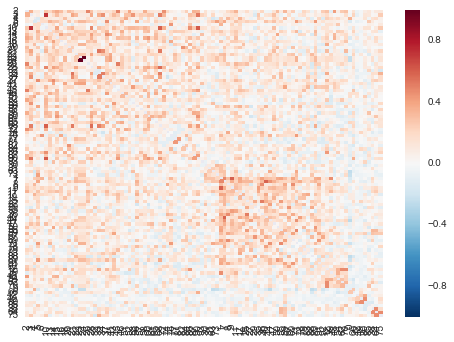

In [884]:
GGG = GGG.corr()
for i in range(94):
    GGG.iloc[i,i] = np.NaN
sns.heatmap(GGG)

In [681]:
print tmp.shape, temp.shape 

(94,) (95, 94)


In [771]:
from sklearn.cluster import DBSCAN

In [874]:
DB = DBSCAN(eps = 0.65,min_samples=7,metric="precomputed")

In [875]:
DB.fit(1-CorrN)

DBSCAN(algorithm='auto', eps=0.65, leaf_size=30, metric='precomputed',
    min_samples=7, n_jobs=1, p=None)

In [876]:
DB.labels_

array([-1,  0,  1,  1, -1,  0, -1,  0, -1,  0,  1, -1,  1, -1,  1,  1, -1,
        0, -1, -1, -1,  1,  1,  0,  0, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0,  1, -1,  0,  1, -1,  0,
       -1,  1,  1, -1,  0,  0, -1,  1, -1,  1, -1, -1,  0, -1,  1,  1, -1,
        1,  0, -1,  0,  1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1,  0,  1,  0, -1, -1])

In [877]:
GG = []
GGG = pd.DataFrame()
tmp = pd.Series(DB.labels_)
for i in set(DB.labels_):
    GG.append(temp[tmp == i])
    GGG = GGG.append(GG[i]) 

GGG = GGG.T

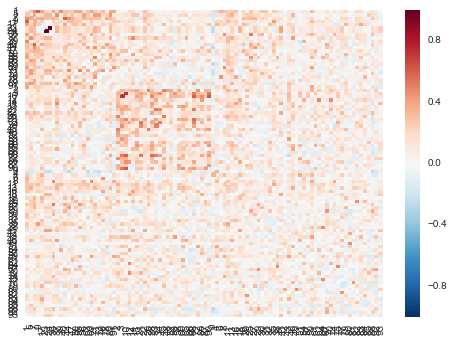

In [878]:
GGG = GGG.corr()
for i in range(94):
    GGG.iloc[i,i] = np.NaN
sns.heatmap(GGG)

In [824]:
1-CorrN

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.000000,1.161920,0.994439,1.030776,0.654140,1.146794,0.970858,1.132205,0.948837,1.090047,...,1.090597,0.993667,1.106467,1.135797,1.253354,1.214368,1.068719,0.912814,1.188156,1.070456
1,1.161920,0.000000,0.927169,0.969391,0.743467,0.726261,0.653574,0.522457,0.698261,0.405584,...,0.975216,1.075102,0.939756,0.973589,0.848473,0.639223,1.048766,0.611655,0.918364,1.002718
2,0.994439,0.927169,0.000000,0.644622,0.876989,0.882481,1.040632,0.930167,0.797229,0.755483,...,0.757941,0.875634,0.981438,0.650068,1.060054,0.885867,0.667528,0.980151,0.743218,0.995774
3,1.030776,0.969391,0.644622,0.000000,0.957021,0.917487,1.015165,0.901899,0.893907,0.846422,...,0.963291,0.885531,0.704539,0.749932,0.972300,0.893721,0.472829,0.942107,0.875020,0.772742
4,0.654140,0.743467,0.876989,0.957021,0.000000,1.150488,0.812126,0.950534,0.679207,0.796596,...,0.985447,1.041483,0.796877,0.859773,1.110739,0.986233,0.968604,0.782791,1.138204,0.966135
5,1.146794,0.726261,0.882481,0.917487,1.150488,0.000000,0.817835,0.619324,0.907202,0.879612,...,0.974986,0.738902,0.897017,0.921558,0.858170,0.572850,0.857304,0.932146,0.846961,1.035046
6,0.970858,0.653574,1.040632,1.015165,0.812126,0.817835,0.000000,0.991009,0.981543,0.780908,...,1.012156,0.923765,0.726606,1.039646,1.033412,0.932534,1.043273,0.918478,1.034634,1.016756
7,1.132205,0.522457,0.930167,0.901899,0.950534,0.619324,0.991009,0.000000,0.823564,0.636543,...,0.926876,1.045431,0.902361,0.907965,0.721870,0.666103,0.942155,0.742598,0.872408,1.089593
8,0.948837,0.698261,0.797229,0.893907,0.679207,0.907202,0.981543,0.823564,0.000000,0.856908,...,0.865023,1.015822,1.119482,0.966059,1.018282,0.906070,1.073344,0.628948,0.967355,0.902133
9,1.090047,0.405584,0.755483,0.846422,0.796596,0.879612,0.780908,0.636543,0.856908,0.000000,...,0.917962,0.918862,0.894078,0.946882,0.934886,0.860229,0.975255,0.754214,0.946436,0.978144


In [889]:
ttt = GGG.describe()
ttt

,2,3,4,5,6,10,13,14,15,16,...,70,0,66,42,49,80,85,38,64,75
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.154205,0.142021,0.095983,0.136081,0.043810,0.132946,0.131490,0.119615,0.121444,0.104347,...,0.061874,-0.030713,0.045543,-0.009546,-0.000474,0.028582,0.020945,0.056547,0.053851,0.059998
std,0.134723,0.153433,0.115783,0.134240,0.099125,0.161657,0.111188,0.128553,0.140499,0.112001,...,0.118756,0.116197,0.110427,0.076675,0.089052,0.104689,0.099943,0.111995,0.110584,0.110778
min,-0.101916,-0.142101,-0.173329,-0.150488,-0.130423,-0.137147,-0.151651,-0.149472,-0.156250,-0.107791,...,-0.123144,-0.262372,-0.177675,-0.107045,-0.093196,-0.155469,-0.151370,-0.148881,-0.091693,-0.165517
25%,0.072831,0.027700,0.030118,0.047906,-0.020387,0.023088,0.043406,0.024642,0.015866,0.020271,...,-0.030495,-0.096372,-0.039223,-0.055141,-0.046468,-0.038619,-0.046138,-0.015686,-0.024900,-0.017917
50%,0.133353,0.106093,0.100148,0.117519,0.013214,0.103942,0.129708,0.101222,0.115840,0.110272,...,0.045303,-0.035764,0.041827,-0.031737,-0.029421,0.024060,0.009041,0.036700,0.023822,0.046345
75%,0.248610,0.237873,0.172148,0.229366,0.090298,0.211153,0.224792,0.192796,0.228580,0.170762,...,0.154401,0.030404,0.122148,0.024468,0.000586,0.086831,0.078280,0.129708,0.103914,0.130300
max,0.493086,0.721080,0.376983,0.468005,0.439280,0.721080,0.366543,0.465302,0.433974,0.404534,...,0.473023,0.345860,0.361217,0.369555,0.461198,0.461198,0.297365,0.475986,0.475986,0.472453


In [890]:
ttt.iloc[3].min()

-0.26237219068723361

In [891]:
ttt.iloc[7].max()

1.0

In [894]:
Matirx.to_pickle("Matrix")